In [2]:
import pandas as pd
import seaborn as sns

In [3]:
glass_data=pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Understanding

In [4]:
glass_data.shape

(214, 10)

In [6]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Number of features and records in the given data set is 10 and 214 respesctively

There is no null values in the data set

## Model Building

In [8]:
x = glass_data.drop(labels='Type',axis=1)
y = glass_data['Type']

In [9]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
x_scaled_df= pd.DataFrame(data = x_scaled,columns=x.columns)
x_scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.20,random_state=12,stratify=y)

## Model Training | Testing | Evaluation

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred=knn_model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.7674418604651163


In [14]:
print(confusion_matrix(y_test,y_pred))

[[13  1  0  0  0  0]
 [ 6  9  0  0  0  0]
 [ 2  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 1  0  0  0  0  5]]


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.59      0.93      0.72        14
           2       0.90      0.60      0.72        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.77        43
   macro avg       0.92      0.78      0.81        43
weighted avg       0.83      0.77      0.76        43



<AxesSubplot:>

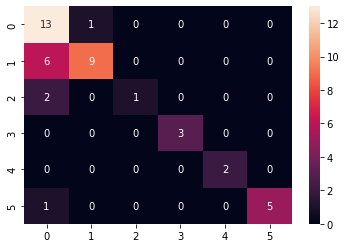

In [16]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

## Tweaking k-value

In [17]:
for i in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    print('K value is: ',i)
    print(accuracy_score(y_test,y_pred))

K value is:  1
0.7674418604651163
K value is:  2
0.6744186046511628
K value is:  3
0.7674418604651163
K value is:  4
0.6976744186046512
K value is:  5
0.6511627906976745
K value is:  6
0.6744186046511628
K value is:  7
0.627906976744186
K value is:  8
0.6046511627906976
K value is:  9
0.5813953488372093
K value is:  10
0.5813953488372093
K value is:  11
0.5813953488372093
K value is:  12
0.5813953488372093
K value is:  13
0.5348837209302325
K value is:  14
0.6046511627906976
K value is:  15
0.5581395348837209
K value is:  16
0.5581395348837209
K value is:  17
0.5581395348837209
K value is:  18
0.5813953488372093
K value is:  19
0.5813953488372093


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred=knn_model.predict(x_test)

In [20]:
print(accuracy_score(y_test,y_pred))

0.7674418604651163
